In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)


Data Preprocessing

In [122]:
matches= pd.read_csv(r"C:\Users\haree\Downloads\IPL_Matches_2008_2022.csv")
balls= pd.read_csv(r"C:\Users\haree\Downloads\IPL_Ball_by_Ball_2008_2022.csv")
print(matches.head())

        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

In [123]:
print(matches.shape)
print(" -------------------- ")
print(matches.isnull().sum())
print(" -------------------- ")
print(matches.info())

(950, 20)
 -------------------- 
ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object

In [124]:
print(matches[matches['WinningTeam'].isna()])

          ID       City        Date Season MatchNumber  \
205  1178424  Bengaluru  2019-04-30   2019          49   
437   829813  Bangalore  2015-05-17   2015          55   
464   829763  Bangalore  2015-04-29   2015          29   
708   501265      Delhi  2011-05-21   2011          68   

                           Team1             Team2                  Venue  \
205  Royal Challengers Bangalore  Rajasthan Royals  M.Chinnaswamy Stadium   
437  Royal Challengers Bangalore  Delhi Daredevils  M Chinnaswamy Stadium   
464  Royal Challengers Bangalore  Rajasthan Royals  M Chinnaswamy Stadium   
708             Delhi Daredevils     Pune Warriors       Feroz Shah Kotla   

                      TossWinner TossDecision SuperOver WinningTeam  \
205             Rajasthan Royals        field       NaN         NaN   
437  Royal Challengers Bangalore        field       NaN         NaN   
464             Rajasthan Royals        field       NaN         NaN   
708             Delhi Daredevils       

In [125]:
# These matches has no Result becomes matches are stopped due to Rain or other reasons, so let's remove them from the data
# First Drop the Unwanted Columns
# matches.drop(['City','ID','method'],axis=1,inplace=True)
# matches = matches.dropna()
# print(matches.head())
matches.drop(['City', 'ID', 'method'], axis=1, inplace=True, errors='ignore')
matches = matches.dropna()
print(matches.head())


         Date Season  MatchNumber                        Team1  \
0  2022-05-29   2022        Final             Rajasthan Royals   
1  2022-05-27   2022  Qualifier 2  Royal Challengers Bangalore   
2  2022-05-25   2022   Eliminator  Royal Challengers Bangalore   
3  2022-05-24   2022  Qualifier 1             Rajasthan Royals   
4  2022-05-22   2022           70          Sunrisers Hyderabad   

                  Team2                             Venue  \
0        Gujarat Titans  Narendra Modi Stadium, Ahmedabad   
1      Rajasthan Royals  Narendra Modi Stadium, Ahmedabad   
2  Lucknow Super Giants             Eden Gardens, Kolkata   
3        Gujarat Titans             Eden Gardens, Kolkata   
4          Punjab Kings          Wankhede Stadium, Mumbai   

             TossWinner TossDecision SuperOver                  WinningTeam  \
0      Rajasthan Royals          bat         N               Gujarat Titans   
1      Rajasthan Royals        field         N             Rajasthan Royals   

In [126]:

print(matches[matches['Season']=='2020/21'].head(2))


           Date   Season  MatchNumber           Team1                Team2  \
134  2020-11-10  2020/21        Final  Delhi Capitals       Mumbai Indians   
135  2020-11-08  2020/21  Qualifier 2  Delhi Capitals  Sunrisers Hyderabad   

                                   Venue      TossWinner TossDecision  \
134  Dubai International Cricket Stadium  Delhi Capitals          bat   
135                 Sheikh Zayed Stadium  Delhi Capitals          bat   

    SuperOver     WinningTeam    WonBy  Margin Player_of_Match  \
134         N  Mumbai Indians  Wickets     5.0        TA Boult   
135         N  Delhi Capitals     Runs    17.0      MP Stoinis   

                                          Team1Players  \
134  ['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...   
135  ['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...   

                                          Team2Players      Umpire1  \
134  ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...  CB Gaffaney   
135  ['PK Garg', 'DA Warner',

In [127]:
# Convert the Date columns into their respective data types
matches['Date'] = pd.to_datetime(matches['Date'])

In [128]:
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [129]:
matches.drop('Season', axis=1, inplace=True, errors='ignore')


print(matches.head())

        Date  MatchNumber                        Team1                 Team2  \
0 2022-05-29        Final             Rajasthan Royals        Gujarat Titans   
1 2022-05-27  Qualifier 2  Royal Challengers Bangalore      Rajasthan Royals   
2 2022-05-25   Eliminator  Royal Challengers Bangalore  Lucknow Super Giants   
3 2022-05-24  Qualifier 1             Rajasthan Royals        Gujarat Titans   
4 2022-05-22           70          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin Player_of_Match 

In [130]:
print(matches['WinningTeam'].unique())

['Gujarat Titans' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Punjab Kings' 'Mumbai Indians' 'Lucknow Super Giants'
 'Sunrisers Hyderabad' 'Delhi Capitals' 'Kolkata Knight Riders'
 'Chennai Super Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [131]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [132]:
matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [133]:
matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [134]:

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')


In [135]:
matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

In [136]:
matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [137]:
print(matches.head())

        Date  MatchNumber                        Team1                 Team2  \
0 2022-05-29        Final             Rajasthan Royals        Gujarat Titans   
1 2022-05-27  Qualifier 2  Royal Challengers Bangalore      Rajasthan Royals   
2 2022-05-25   Eliminator  Royal Challengers Bangalore  Lucknow Super Giants   
3 2022-05-24  Qualifier 1             Rajasthan Royals        Gujarat Titans   
4 2022-05-22           70          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin Player_of_Match 

let's check the Ball by Ball Datafram and Build the Statistical Dataframe out of it so that we can build the Dashbaord or Perform Visualisation out of it.

In [138]:

print(balls.head())

        ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0     

In [139]:
print(balls.shape)
print(" -------------------- ")
print(balls.isnull().sum())
print(" -------------------- ")
print(balls.info())

(225954, 17)
 -------------------- 
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   

In [140]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
print(batsman_Stats.head())

                Balls_Faced
batter                     
A Ashish Reddy          196
A Badoni                139
A Chandila                7
A Chopra                 75
A Choudhary              20


In [141]:
batsman_Stats['innings']=batgroup['innings'].nunique()
print(batsman_Stats.head())

                Balls_Faced  innings
batter                              
A Ashish Reddy          196        2
A Badoni                139        2
A Chandila                7        1
A Chopra                 75        2
A Choudhary              20        2


In [142]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
print(batsman_Stats.head())

                Balls_Faced  innings  runs
batter                                    
A Ashish Reddy          196        2   280
A Badoni                139        2   161
A Chandila                7        1     4
A Chopra                 75        2    53
A Choudhary              20        2    25


In [143]:
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
print(batsman_Stats.head())

                Balls_Faced  innings  runs    0s
batter                                          
A Ashish Reddy          196        2   280  61.0
A Badoni                139        2   161  57.0
A Chandila                7        1     4   3.0
A Chopra                 75        2    53  45.0
A Choudhary              20        2    25   4.0


In [144]:

batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)


In [145]:
batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

In [146]:
batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

In [147]:

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)


In [148]:
batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

In [149]:
print(batsman_Stats.head())

                Balls_Faced  innings  runs    0s    1s    2s   3s    4s    6s
batter                                                                       
A Ashish Reddy          196        2   280  61.0  83.0  20.0  1.0  16.0  15.0
A Badoni                139        2   161  57.0  53.0  11.0  0.0  11.0   7.0
A Chandila                7        1     4   3.0   4.0   0.0  0.0   0.0   0.0
A Chopra                 75        2    53  45.0  21.0   2.0  0.0   7.0   0.0
A Choudhary              20        2    25   4.0  13.0   1.0  0.0   1.0   1.0


In [150]:

batsman_Stats['player_out']=batgroup['player_out'].count()
print(batsman_Stats.head())

                Balls_Faced  innings  runs    0s    1s    2s   3s    4s    6s  \
batter                                                                          
A Ashish Reddy          196        2   280  61.0  83.0  20.0  1.0  16.0  15.0   
A Badoni                139        2   161  57.0  53.0  11.0  0.0  11.0   7.0   
A Chandila                7        1     4   3.0   4.0   0.0  0.0   0.0   0.0   
A Chopra                 75        2    53  45.0  21.0   2.0  0.0   7.0   0.0   
A Choudhary              20        2    25   4.0  13.0   1.0  0.0   1.0   1.0   

                player_out  
batter                      
A Ashish Reddy          15  
A Badoni                 9  
A Chandila               1  
A Chopra                 5  
A Choudhary              2  


In [151]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
print(batsman_Stats.head())

                Balls_Faced  innings  runs    0s    1s    2s   3s    4s    6s  \
batter                                                                          
A Ashish Reddy          196        2   280  61.0  83.0  20.0  1.0  16.0  15.0   
A Badoni                139        2   161  57.0  53.0  11.0  0.0  11.0   7.0   
A Chandila                7        1     4   3.0   4.0   0.0  0.0   0.0   0.0   
A Chopra                 75        2    53  45.0  21.0   2.0  0.0   7.0   0.0   
A Choudhary              20        2    25   4.0  13.0   1.0  0.0   1.0   1.0   

                player_out  bat_average  bat_strike  
batter                                               
A Ashish Reddy          15        18.67      142.86  
A Badoni                 9        17.89      115.83  
A Chandila               1         4.00       57.14  
A Chopra                 5        10.60       70.67  
A Choudhary              2        12.50      125.00  


 Bowler Statistics

In [152]:
bowlgroup = balls.groupby(['bowler'])
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [153]:
print(balls['kind'].unique())


[nan 'caught' 'caught and bowled' 'run out' 'bowled' 'stumped' 'lbw'
 'hit wicket' 'retired hurt' 'retired out' 'obstructing the field']


In [154]:
# Get only useful Wicket and Outs
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
print(bowler_Stats.head())

                BallsThrow  wickets
bowler                             
A Ashish Reddy         270     18.0
A Badoni                12      2.0
A Chandila             234     11.0
A Choudhary            108      5.0
A Dananjaya             25      NaN


In [155]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [156]:
# Calculating total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
print(bowler_Stats.head())

                BallsThrow  wickets  overs
bowler                                    
A Ashish Reddy         270     18.0   45.0
A Badoni                12      2.0    2.0
A Chandila             234     11.0   39.0
A Choudhary            108      5.0   18.0
A Dananjaya             25      0.0    4.0


In [157]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
print(bowler_Stats.head())

                BallsThrow  wickets  overs  runs_conceded
bowler                                                   
A Ashish Reddy         270     18.0   45.0            386
A Badoni                12      2.0    2.0             11
A Chandila             234     11.0   39.0            242
A Choudhary            108      5.0   18.0            137
A Dananjaya             25      0.0    4.0             46


In [158]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)
print(bowler_Stats.head())

                BallsThrow  wickets  overs  runs_conceded
bowler                                                   
A Ashish Reddy         270     18.0   45.0          396.0
A Badoni                12      2.0    2.0           11.0
A Chandila             234     11.0   39.0          242.0
A Choudhary            108      5.0   18.0          144.0
A Dananjaya             25      0.0    4.0           47.0


In [159]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
print(bowler_Stats.head())

                BallsThrow  wickets  overs  runs_conceded  bowl_econ  \
bowler                                                                 
A Ashish Reddy         270     18.0   45.0          396.0       8.80   
A Badoni                12      2.0    2.0           11.0       5.50   
A Chandila             234     11.0   39.0          242.0       6.21   
A Choudhary            108      5.0   18.0          144.0       8.00   
A Dananjaya             25      0.0    4.0           47.0      11.75   

                bowl_strike_rate  
bowler                            
A Ashish Reddy             15.00  
A Badoni                    6.00  
A Chandila                 21.27  
A Choudhary                21.60  
A Dananjaya                  inf  


In [160]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}


In [161]:
# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

print(final_players_matches.head())

                matches
Players                
YBK Jaiswal          23
JC Buttler           81
Mohammed Shami       93
Yash Dayal            9
SV Samson           134


In [162]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

In [163]:
catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)


In [164]:
print(catchDf.head())

                catches
A Ashish Reddy      9.0
A Badoni            9.0
A Chandila          7.0
A Chopra            2.0
A Flintoff          4.0


Now, We have Batsman, Bowler Statistics, Let's merge them using the Merge Function and make a full_fledge DataFrame with all information of players and then we get the Clusters of Best players out of all.

In [165]:
# Merging Batsman Stats
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()


,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [166]:
print(final_df.columns.tolist())


['matches', 'Balls_Faced', 'innings', 'runs', '0s', '1s', '2s', '3s', '4s', '6s', 'player_out', 'bat_average', 'bat_strike', 'BallsThrow', 'wickets', 'overs', 'runs_conceded', 'bowl_econ', 'bowl_strike_rate', 'catches', 'count']


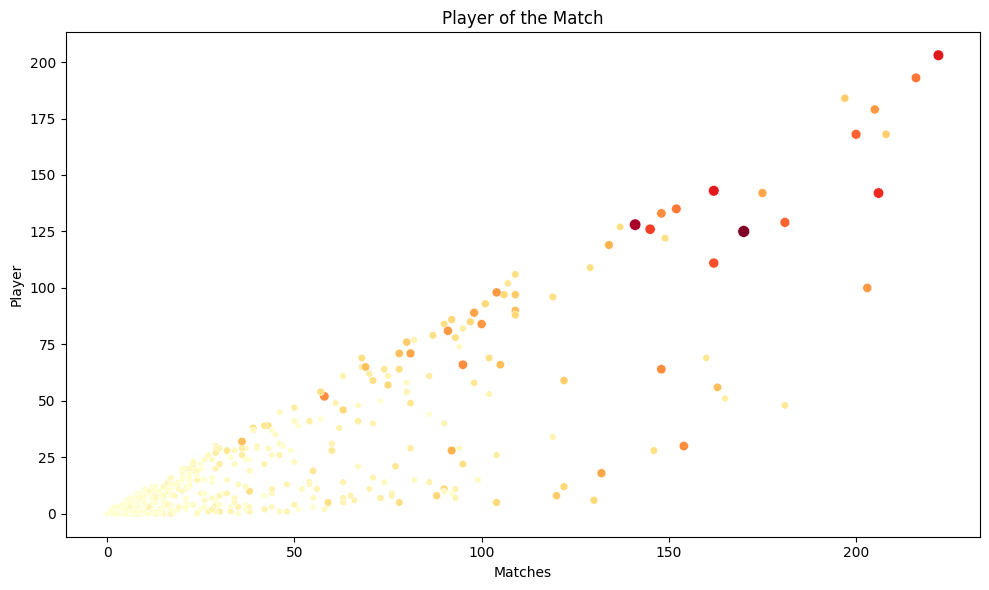

In [167]:
# Scatter plot: Most Player of the Match awards by player
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='matches', y='player_out', size='count', hue='count', palette='YlOrRd', legend=False)
plt.title('Player of the Match')
plt.xlabel('Matches')
plt.ylabel('Player')
plt.tight_layout()
plt.show()



 # As we see the best players in the IPL so far, Let's see the players who miss opportunities and score most time 0's to balls they faced or out most of the time in IPL so far.

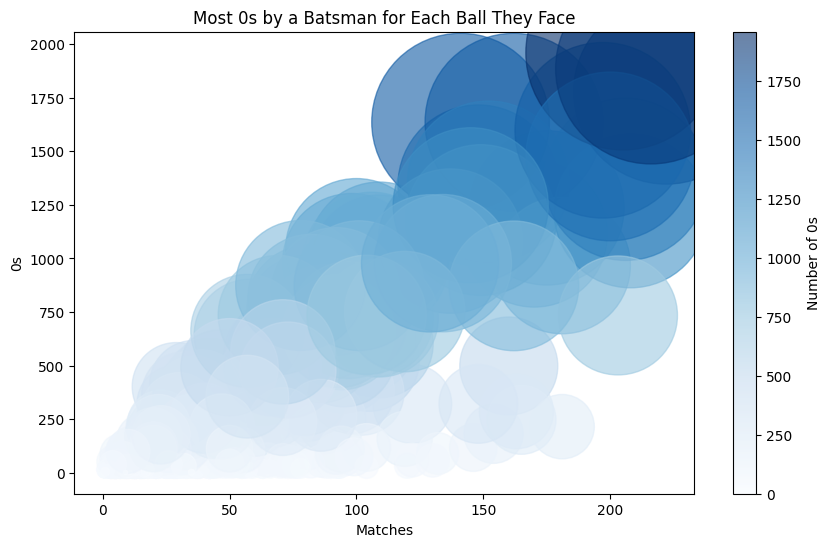

In [168]:
plt.figure(figsize=(10, 6))
scatter1 = plt.scatter(final_df['matches'], final_df['0s'], c=final_df['0s'], s=final_df['0s']*10, 
                       cmap='Blues', alpha=0.6)  # s = size of points, scaled by 0s
plt.colorbar(scatter1, label='Number of 0s')
plt.title('Most 0s by a Batsman for Each Ball They Face')
plt.xlabel('Matches')
plt.ylabel('0s')
plt.show()


In [169]:
final_df['not_out'] = final_df['matches'] - final_df['player_out']

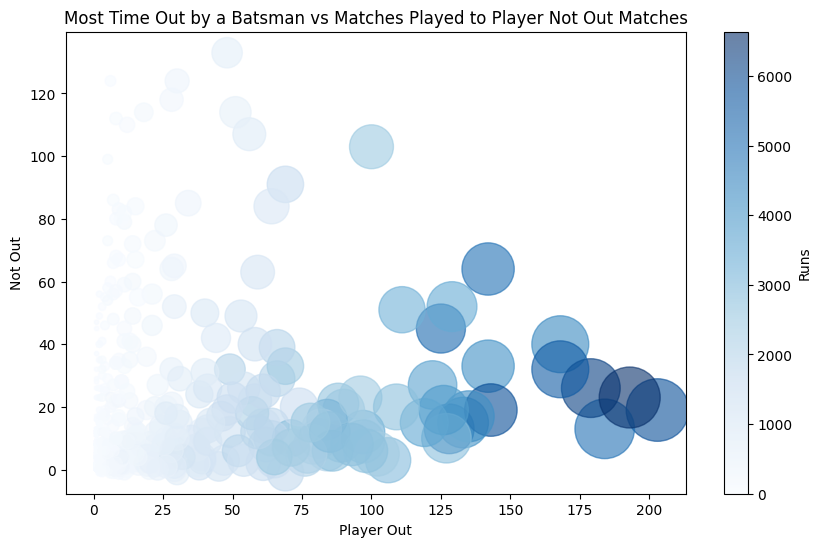

In [170]:
plt.figure(figsize=(10, 6))
scatter2 = plt.scatter(final_df['player_out'], final_df['not_out'], c=final_df['runs'], s=final_df['player_out']*10, 
                       cmap='Blues', alpha=0.6)  # s = size of points, scaled by player_out
plt.colorbar(scatter2, label='Runs')
plt.title('Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
plt.xlabel('Player Out')
plt.ylabel('Not Out')
plt.show()

In [171]:
final_df = final_df[final_df['matches']>50]
print(final_df.head())

                matches  Balls_Faced  innings    runs      0s      1s     2s  \
A Mishra          154.0        410.0      2.0   362.0   182.0   172.0   22.0   
A Nehra            88.0         63.0      2.0    41.0    37.0    21.0    1.0   
AB Dinda           76.0         50.0      2.0    26.0    31.0    16.0    1.0   
AB de Villiers    170.0       3487.0      4.0  5181.0  1115.0  1420.0  268.0   
AC Gilchrist       80.0       1555.0      2.0  2069.0   737.0   417.0   66.0   

                  3s     4s     6s  player_out  bat_average  bat_strike  \
A Mishra         0.0   29.0    5.0        30.0        12.07       88.29   
A Nehra          0.0    3.0    1.0         8.0         5.12       65.08   
AB Dinda         0.0    2.0    0.0         9.0         2.89       52.00   
AB de Villiers  17.0  414.0  253.0       125.0        41.45      148.58   
AC Gilchrist     4.0  239.0   92.0        76.0        27.22      133.05   

                BallsThrow  wickets  overs  runs_conceded  bowl_econ

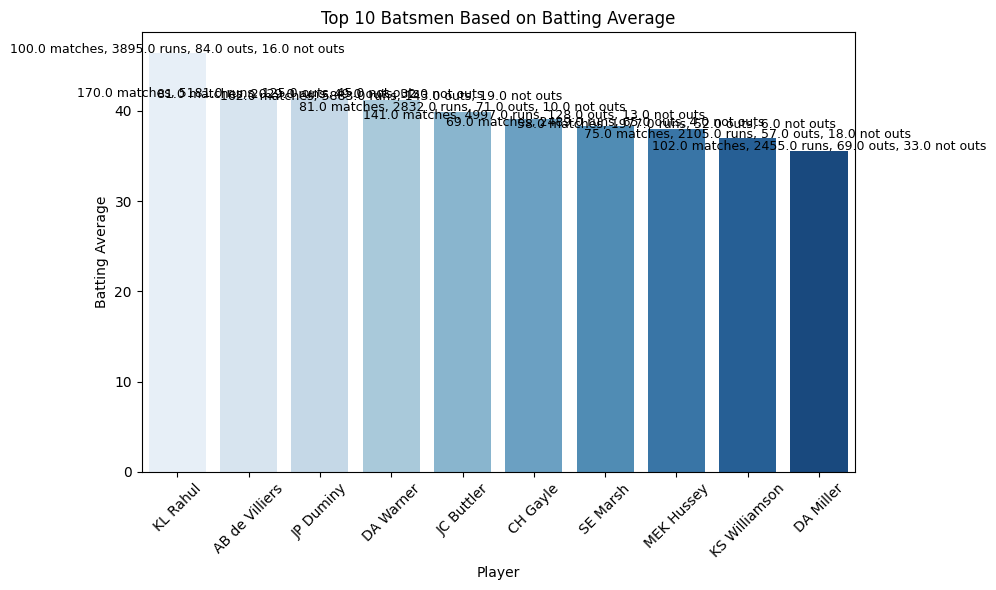

In [172]:


if 'not_out' not in final_df.columns:
    final_df['not_out'] = final_df['matches'] - final_df['player_out']  # Recalculate 'not_out' if necessary
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10, x=df_top10.index, y='bat_average', palette='Blues')
plt.title('Top 10 Batsmen Based on Batting Average')
plt.xlabel('Player')
plt.ylabel('Batting Average')
for i, player in enumerate(df_top10.index):
    plt.text(i, df_top10['bat_average'].iloc[i] + 0.05,
             f"{df_top10['matches'].iloc[i]} matches, {df_top10['runs'].iloc[i]} runs, "
             f"{df_top10['player_out'].iloc[i]} outs, {df_top10['not_out'].iloc[i]} not outs",
             ha='center', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

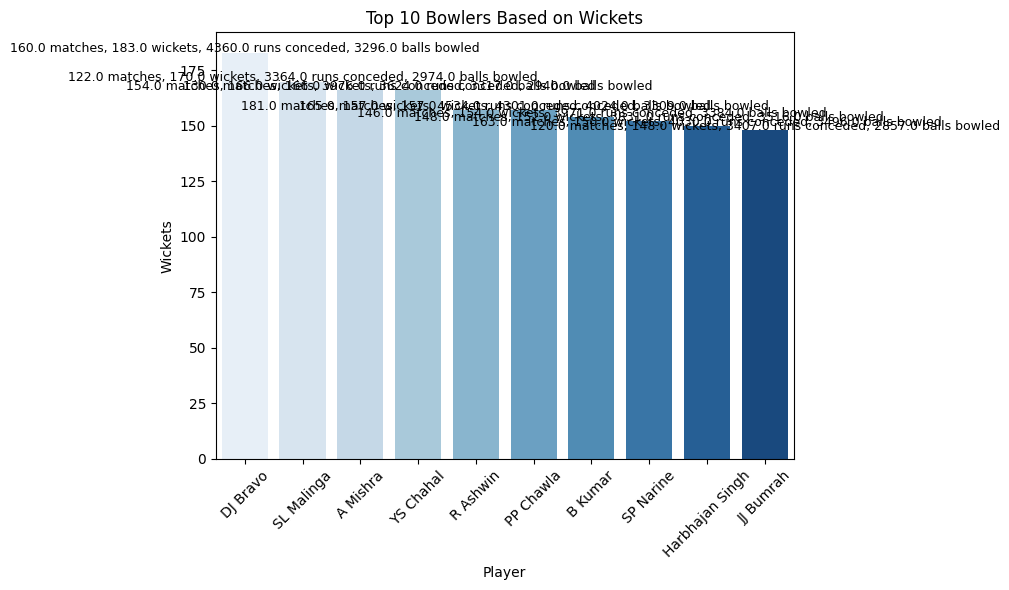

In [173]:
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10, x=df_top10.index, y='wickets', palette='Blues')
plt.title('Top 10 Bowlers Based on Wickets')
plt.xlabel('Player')
plt.ylabel('Wickets')
for i, player in enumerate(df_top10.index):
    plt.text(i, df_top10['wickets'].iloc[i] + 0.1,
             f"{df_top10['matches'].iloc[i]} matches, {df_top10['wickets'].iloc[i]} wickets, "
             f"{df_top10['runs_conceded'].iloc[i]} runs conceded, {df_top10['BallsThrow'].iloc[i]} balls bowled",
             ha='center', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
print(matches.head(2))

        Date  MatchNumber                        Team1             Team2  \
0 2022-05-29        Final             Rajasthan Royals    Gujarat Titans   
1 2022-05-27  Qualifier 2  Royal Challengers Bangalore  Rajasthan Royals   

                              Venue        TossWinner TossDecision SuperOver  \
0  Narendra Modi Stadium, Ahmedabad  Rajasthan Royals          bat         N   
1  Narendra Modi Stadium, Ahmedabad  Rajasthan Royals        field         N   

        WinningTeam    WonBy  Margin Player_of_Match  \
0    Gujarat Titans  Wickets     7.0       HH Pandya   
1  Rajasthan Royals  Wickets     7.0      JC Buttler   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   

                                        Team2Players      Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...  CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...  

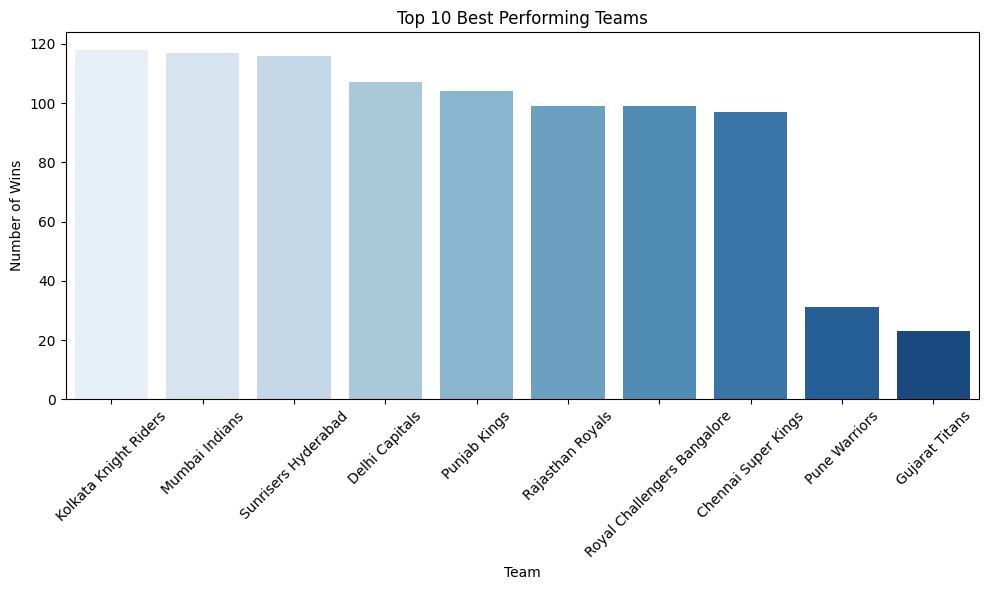

In [175]:


matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)
wins = matches["WinningTeam"].value_counts()
win_percentages = wins.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentages.index[:10], y=win_percentages.values[:10], palette='Blues')
plt.title("Top 10 Best Performing Teams")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

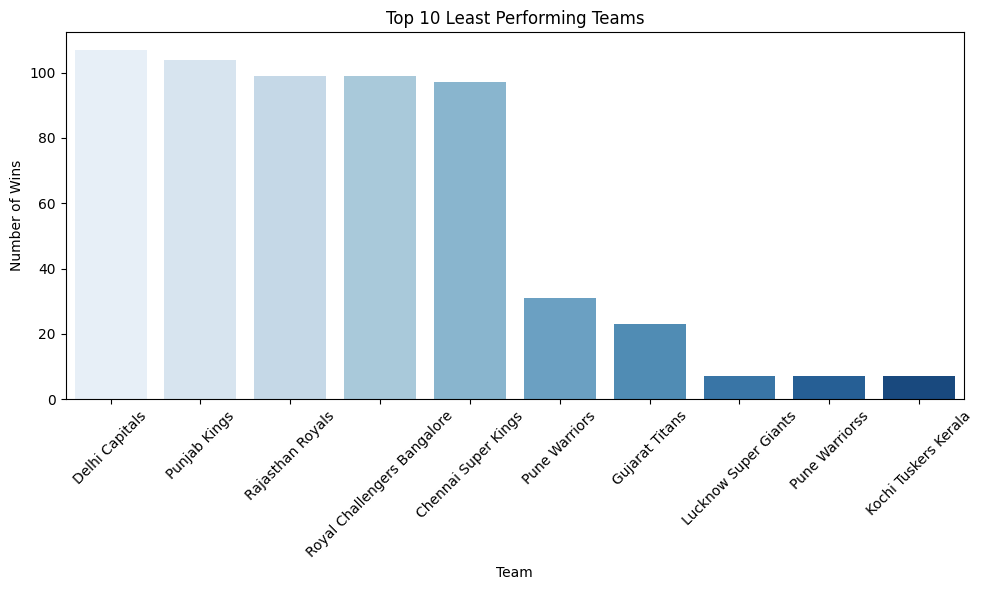

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentages.index[-10:], y=win_percentages.values[-10:], palette='Blues')
plt.title("Top 10 Least Performing Teams")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
matches = pd.read_csv(r"C:\Users\haree\Downloads\IPL_Matches_2008_2022.csv")
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [178]:
# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

In [179]:
# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

In [180]:
# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

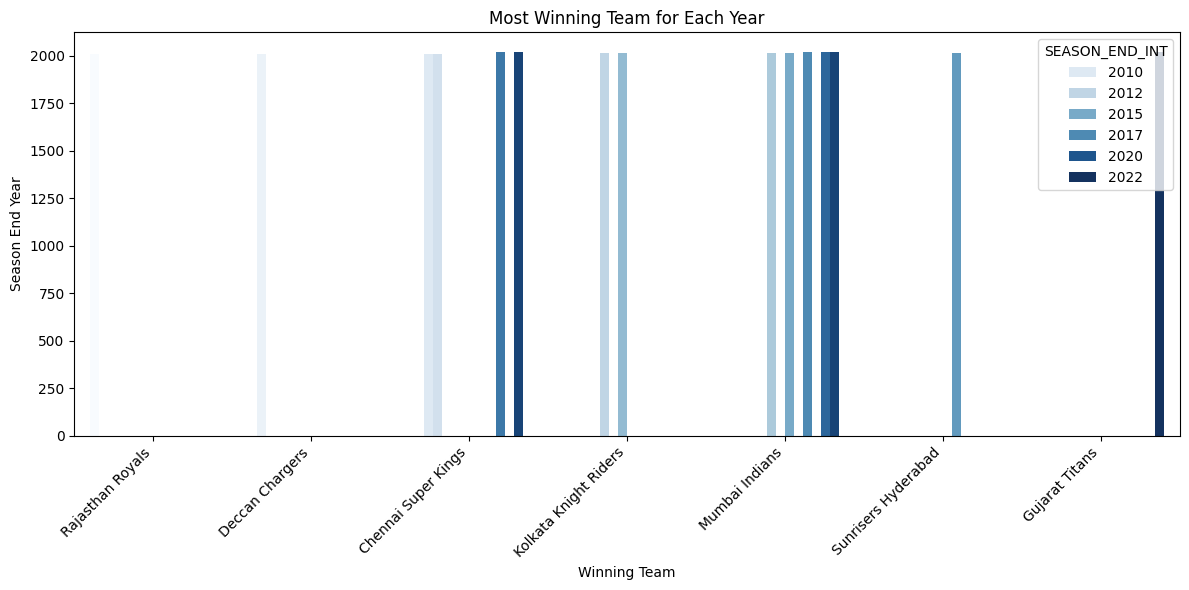

In [181]:
plt.figure(figsize=(12, 6))
sns.barplot(data=winning_teams, x='WinningTeam', y='SEASON_END_INT', hue='SEASON_END_INT', palette='Blues')
plt.title('Most Winning Team for Each Year')
plt.xlabel('Winning Team')
plt.ylabel('Season End Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

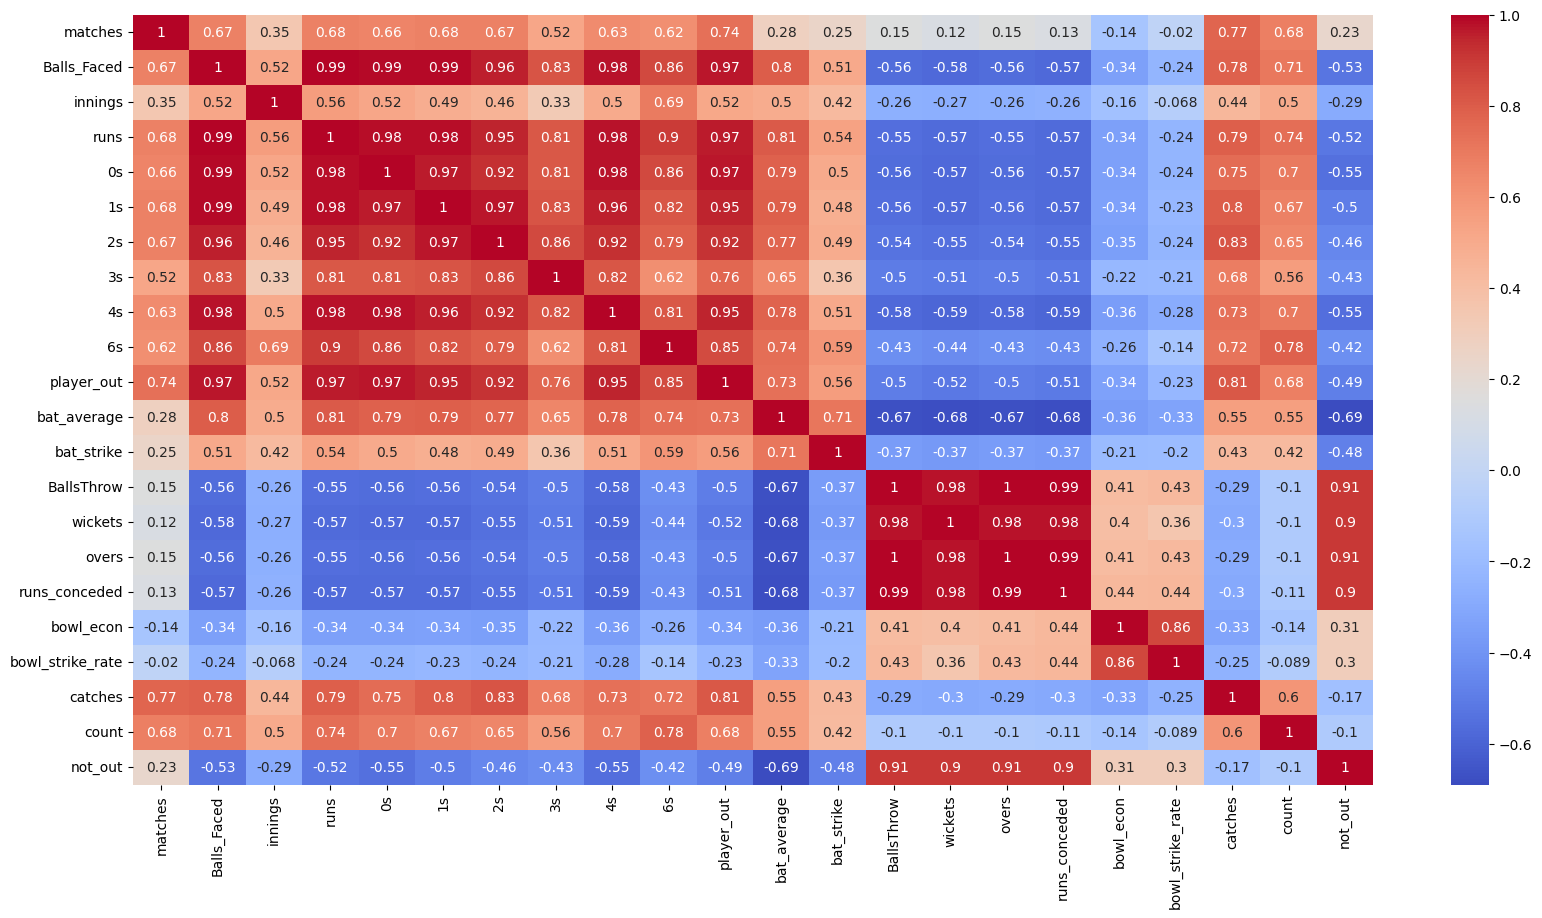

In [182]:
# Best Players of Time using K-Means Clustering

# Let's Remove the Most Correlated Columns

plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.show()

def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr


In [183]:
corr_cols = correlation(final_df,0.85)
corr_cols
top_columns =final_df.drop(['runs', '0s', '1s', '2s', '3s', '4s', '6s', 'player_out', 'wickets', 'overs', 'runs_conceded', 'bowl_strike_rate'],axis=1)

In [184]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
print(final_df_new.head())

                matches  Balls_Faced  innings  bat_average  bat_strike  \
A Mishra          154.0        410.0      2.0        12.07       88.29   
A Nehra            88.0         63.0      2.0         5.12       65.08   
AB Dinda           76.0         50.0      2.0         2.89       52.00   
AB de Villiers    170.0       3487.0      4.0        41.45      148.58   
AC Gilchrist       80.0       1555.0      2.0        27.22      133.05   

                BallsThrow  bowl_econ  catches  count  not_out  
A Mishra            3317.0       7.19     21.0   12.0    124.0  
A Nehra             1974.0       7.58     19.0    6.0     80.0  
AB Dinda            1589.0       7.82      7.0    2.0     67.0  
AB de Villiers         0.0       0.00    120.0   24.0     45.0  
AC Gilchrist           1.0       0.00     51.0    7.0      4.0  


In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
print(scaled_data.head())

                 matches  Balls_Faced   innings  bat_average  bat_strike  \
A Mishra        1.284238    -0.698228 -0.509563    -0.865744   -1.059655   
A Nehra        -0.292123    -0.986563 -0.509563    -1.530885   -2.001902   
AB Dinda       -0.578734    -0.997365 -0.509563    -1.744305   -2.532906   
AB de Villiers  1.666387     1.858559  2.571516     1.946034    1.387913   
AC Gilchrist   -0.483197     0.253192 -0.509563     0.584169    0.757448   

                BallsThrow  bowl_econ   catches     count   not_out  
A Mishra          2.127278   0.310825 -0.588725  1.429841  2.504397  
A Nehra           0.859354   0.417325 -0.663943  0.128469  1.159060  
AB Dinda          0.495876   0.482864 -1.115251 -0.739113  0.761574  
AB de Villiers   -1.004295  -1.652602  3.134565  4.032587  0.088905  
AC Gilchrist     -1.003351  -1.652602  0.539544  0.345364 -1.164705  


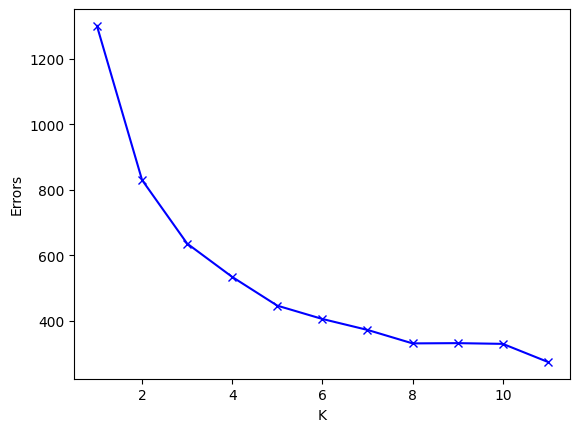

In [186]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')

In [187]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred
print(final_df_new.head())

                matches  Balls_Faced  innings  bat_average  bat_strike  \
A Mishra          154.0        410.0      2.0        12.07       88.29   
A Nehra            88.0         63.0      2.0         5.12       65.08   
AB Dinda           76.0         50.0      2.0         2.89       52.00   
AB de Villiers    170.0       3487.0      4.0        41.45      148.58   
AC Gilchrist       80.0       1555.0      2.0        27.22      133.05   

                BallsThrow  bowl_econ  catches  count  not_out  cluster  
A Mishra            3317.0       7.19     21.0   12.0    124.0        3  
A Nehra             1974.0       7.58     19.0    6.0     80.0        1  
AB Dinda            1589.0       7.82      7.0    2.0     67.0        1  
AB de Villiers         0.0       0.00    120.0   24.0     45.0        0  
AC Gilchrist           1.0       0.00     51.0    7.0      4.0        2  


In [188]:

final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])
print(topPlayers_cluster)

         PlayerNames  cluster
0           A Mishra        3
1            A Nehra        1
2           AB Dinda        1
3     AB de Villiers        0
4       AC Gilchrist        2
..               ...      ...
125  Y Venugopal Rao        1
126        YK Pathan        0
127        YS Chahal        3
128     Yuvraj Singh        2
129           Z Khan        1

[130 rows x 2 columns]


In [189]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [190]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])


In [191]:

TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')
print(TopPlayer_Dataset)

            teams1       teams2            teams3           teams4
0   AB de Villiers      A Nehra      AC Gilchrist         A Mishra
1        AT Rayudu     AB Dinda        AD Russell         AR Patel
2         CH Gayle     AM Nayar          AJ Finch          B Kumar
3        HH Pandya    CH Morris         AM Rahane         DJ Bravo
4       KA Pollard    DL Chahar       BB McCullum  Harbhajan Singh
5       KD Karthik  DS Kulkarni          BJ Hodge        JJ Bumrah
6         MS Dhoni     DW Steyn         DA Miller          P Kumar
7        RG Sharma     HV Patel          DJ Hooda        PP Chawla
8       RV Uthappa     I Sharma         DJ Hussey         R Ashwin
9         S Dhawan    IK Pathan  DPMD Jayawardene        RA Jadeja
10        SK Raina  Imran Tahir          DR Smith      Rashid Khan
11       SR Watson    JA Morkel        EJG Morgan       SL Malinga
12         V Kohli   JD Unadkat      F du Plessis        SP Narine
13       YK Pathan  JP Faulkner         G Gambhir   Sandeep Sh

Winning Prediction Model

In [192]:
matches = pd.read_csv(r"C:\Users\haree\Downloads\IPL_Matches_2008_2022.csv")
balls = pd.read_csv(r"C:\Users\haree\Downloads\IPL_Ball_by_Ball_2008_2022.csv")


In [193]:
inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
print(inningScores.head(10))

        ID  innings  total_run
0   335982        1        222
2   335983        1        240
4   335984        1        129
6   335985        1        165
8   335986        1        110
10  335987        1        166
12  335988        1        142
14  335989        1        208
16  335990        1        214
18  335991        1        182


In [194]:
inningScores['target'] = inningScores['total_run'] + 1
print(inningScores.head(10))

        ID  innings  total_run  target
0   335982        1        222     223
2   335983        1        240     241
4   335984        1        129     130
6   335985        1        165     166
8   335986        1        110     111
10  335987        1        166     167
12  335988        1        142     143
14  335989        1        208     209
16  335990        1        214     215
18  335991        1        182     183


In [195]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

In [196]:

matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [197]:
matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [198]:
matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [199]:
matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')


In [200]:
matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

In [201]:
matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

In [202]:
matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [203]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [204]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

In [205]:
print(matches['Team1'].unique())

['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians']


In [206]:
print(matches.head())

        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

In [207]:
print(matches.isnull().sum())


ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
target               0
dtype: int64


In [208]:
matches = matches[['ID','City','Team1','Team2','WinningTeam','target']].dropna()
print(matches.head())

        ID       City                        Team1                 Team2  \
0  1312200  Ahmedabad             Rajasthan Royals        Gujarat Titans   
1  1312199  Ahmedabad  Royal Challengers Bangalore      Rajasthan Royals   
2  1312198    Kolkata  Royal Challengers Bangalore  Lucknow Super Giants   
3  1312197    Kolkata             Rajasthan Royals        Gujarat Titans   
4  1304116     Mumbai          Sunrisers Hyderabad          Punjab Kings   

                   WinningTeam  target  
0               Gujarat Titans     131  
1             Rajasthan Royals     158  
2  Royal Challengers Bangalore     208  
3               Gujarat Titans     189  
4                 Punjab Kings     158  


In [209]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [210]:

balls = balls[balls['BattingTeam'].isin(teams2023)]
print(balls.head())


        ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0     

In [211]:
final = matches.merge(balls, on='ID')
print(final.head())

        ID       City             Team1           Team2     WinningTeam  \
0  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
1  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
2  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
3  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
4  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

   target  innings  overs  ballnumber       batter          bowler  \
0     131        1      0           1  YBK Jaiswal  Mohammed Shami   
1     131        1      0           2  YBK Jaiswal  Mohammed Shami   
2     131        1      0           3   JC Buttler  Mohammed Shami   
3     131        1      0           4  YBK Jaiswal  Mohammed Shami   
4     131        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           

In [212]:
final = final[final['innings']==2]
print(final.head())

          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [213]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
print(final.head())

          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [214]:

final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
print(final.head())

          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [215]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
print(final.head())

          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [216]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
print(final.head())

          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [217]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0
     

final['result'] = final.apply(result, axis=1)
print(final.head())


          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [218]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
print(final.head())

          ID       City             Team1           Team2     WinningTeam  \
120  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
121  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
122  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
123  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   
124  1312200  Ahmedabad  Rajasthan Royals  Gujarat Titans  Gujarat Titans   

     target  innings  overs  ballnumber        batter    bowler   non-striker  \
120     131        2      0           1       WP Saha  TA Boult  Shubman Gill   
121     131        2      0           2       WP Saha  TA Boult  Shubman Gill   
122     131        2      0           3       WP Saha  TA Boult  Shubman Gill   
123     131        2      0           4  Shubman Gill  TA Boult       WP Saha   
124     131        2      0           5  Shubman Gill  TA Boult       WP Saha   

    extra_type  batsman_run  extras_run  total_run

In [219]:
winningPred = final[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
print(winningPred.head())

        BattingTeam       BowlingTeam       City  runs_left  balls_left  \
120  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         119   
121  Gujarat Titans  Rajasthan Royals  Ahmedabad        131         118   
122  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         117   
123  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         116   
124  Gujarat Titans  Rajasthan Royals  Ahmedabad        130         115   

     wickets_left  current_run_rate  required_run_rate  target  result  
120            10               0.0           6.605042     131       1  
121            10               0.0           6.661017     131       1  
122            10               2.0           6.666667     131       1  
123            10               1.5           6.724138     131       1  
124            10               1.2           6.782609     131       1  


In [220]:
print(winningPred.sample())


           BattingTeam            BowlingTeam     City  runs_left  balls_left  \
140998  Mumbai Indians  Kolkata Knight Riders  Kolkata        148         101   

        wickets_left  current_run_rate  required_run_rate  target  result  
140998             9          8.842105           8.792079     176       1  


In [221]:
# import sys
# print(sys.executable)


In [222]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['BattingTeam', 'BowlingTeam', 'City'])
], remainder='passthrough')

     
X = winningPred.drop('result', axis=1)
y = winningPred['result']
print(X.shape, y.shape)

(92862, 9) (92862,)


In [223]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
     

print(pipe.predict_proba(X_test))

[[0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 ...
 [0.01 0.99]
 [1.   0.  ]
 [0.94 0.06]]


In [225]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)
print("*"*100)
print(pipe.predict_proba(team2023))

****************************************************************************************************
[[0.52 0.48]]


In [226]:
# import pickle
# from sklearn.ensemble import RandomForestClassifier

# # Assuming X_train and y_train are already defined
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Save the trained model
# with open("ipl_model.pkl", "wb") as f:
#     pickle.dump(model, f)


In [227]:
import pickle
pickle.dump(pipe, open('ipl_model.pkl', 'wb'))

In [228]:
# import pickle

# # Train your model (e.g., KMeans, LogisticRegression, etc.)
# model = ...

# # Save the model
# with open('ipl_model.pkl', 'wb') as file:
#     pickle.dump(model, file)



In [229]:
print(model)  # If it prints '...', it's not a trained model


KMeans(n_clusters=4)
